# Dataset Info
This data is taken from UCI.
https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

# Domain:
Banking

# Objective: 
To build a classifier that can predict whether a person is going to default or not based on their credit history details.

In [1]:
###  Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set(rc={'figure.figsize':(13.7,8.27)}) # setting constant to increase seaborn graph sizes

In [2]:
### 2. Read the data as a data frame
origCreditDf = pd.read_csv('credit.csv')
origCreditDf.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


# Attribute Information:

- default 
  1 - yes 0 - no

- account_check_status:  (qualitative)
	       Status of existing checking account
               A11 :      ... <    0 DM  (DM - Deutsch Mark)
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM /
		     salary assignments for at least 1 year
               A14 : no checking account

- duration_in_month:  (numerical)
	      Duration in month

- credit_history:  (qualitative)
	      Credit history
	      A30 : no credits taken/
		    all credits paid back duly
              A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
              A33 : delay in paying off in the past
	      A34 : critical account/
		    other credits existing (not at this bank)

- purpose:  (qualitative)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

- credit_amount:  (numerical)
	      Credit amount

- savings:  (qualitative)
	      Savings account/bonds
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
              A65 :   unknown/ no savings account

- present_emp_since:  (qualitative)
	      Present employment since
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

- installment_as_income_perc:  (numerical)
	      Installment rate in percentage of disposable income

- personal_status_sex:  (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
              A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single
          
- present_res_since: (numerical)
	      Present residence since         
          
- property: (qualitative)
	      Property
	      A121 : real estate
	      A122 : if not A121 : building society savings agreement/
				   life insurance
              A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property

- age: (numerical)
	      Age in years

- other_installment_plans: (qualitative)
	      Other installment plans 
	      A141 : bank
	      A142 : stores
	      A143 : none

- housing: (qualitative)
	      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free

- credits_this_bank	: (numerical)
              Number of existing credits at this bank

- job	: (qualitative)
	      Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer

- people_under_maintenance: (numerical)
	      Number of people being liable to provide maintenance for

- telephone: (qualitative)
	      Telephone
	      A191 : none
	      A192 : yes, registered under the customers name

- foreign_worker: (qualitative)
	      foreign worker
	      A201 : yes
	      A202 : no
          


In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print("Size of dataframe is " +color.BOLD+ format(origCreditDf.size) + color.END)
print("Shape(#rows,#columns) of dataframe is "+color.BOLD+ format(origCreditDf.shape) + color.END)
print("Dataframe information \n")
print(origCreditDf.info())

Size of dataframe is 21000
Shape(#rows,#columns) of dataframe is (1000, 21)
Dataframe information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 

In [4]:
#checking for missing values
origCreditDf.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [5]:

## Dataset has no missing values. 5 point summary of numerical attributes
origCreditDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [6]:
obj_origCreditDf=origCreditDf.select_dtypes(include=['object']).copy()
obj_origCreditDf.head(5)
print('defaulters :',origCreditDf['default'].unique())
# Number of 'good' credits (should be 700) and 'bad credits (should be 300)
origCreditDf['default'].value_counts()

defaulters : [0 1]


0    700
1    300
Name: default, dtype: int64

In [7]:
print("Shape(#rows,#columns) of dataframe is "+color.BOLD+ format(obj_origCreditDf.shape) + color.END)
print(obj_origCreditDf.info())
print(obj_origCreditDf.columns)

Shape(#rows,#columns) of dataframe is (1000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
account_check_status       1000 non-null object
credit_history             1000 non-null object
purpose                    1000 non-null object
savings                    1000 non-null object
present_emp_since          1000 non-null object
personal_status_sex        1000 non-null object
other_debtors              1000 non-null object
property                   1000 non-null object
other_installment_plans    1000 non-null object
housing                    1000 non-null object
job                        1000 non-null object
telephone                  1000 non-null object
foreign_worker             1000 non-null object
dtypes: object(13)
memory usage: 101.6+ KB
None
Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installm

In [8]:
#Let's see possible values of  categrical variables in data

print('account_check_status        :',obj_origCreditDf['account_check_status'].unique())
print('credit_history :',obj_origCreditDf['credit_history'].unique())
print('purpose :',obj_origCreditDf['purpose'].unique())
print('savings :',obj_origCreditDf['savings'].unique())
print('present_emp_since :',obj_origCreditDf['present_emp_since'].unique())
print('personal_status_sex :',obj_origCreditDf['personal_status_sex'].unique())
print('other_debtors :',obj_origCreditDf['other_debtors'].unique())
print('property :',obj_origCreditDf['property'].unique())
print('other_installment_plans :',obj_origCreditDf['other_installment_plans'].unique())
print('housing :',obj_origCreditDf['housing'].unique())
print('job :',obj_origCreditDf['job'].unique())
print('telephone :',obj_origCreditDf['telephone'].unique())
print('foreign_worker :',obj_origCreditDf['foreign_worker'].unique())

account_check_status        : ['< 0 DM' '0 <= ... < 200 DM' 'no checking account'
 '>= 200 DM / salary assignments for at least 1 year']
credit_history : ['critical account/ other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/ all credits paid back duly'
 'all credits at this bank paid back duly']
purpose : ['domestic appliances' '(vacation - does not exist?)' 'radio/television'
 'car (new)' 'car (used)' 'business' 'repairs' 'education'
 'furniture/equipment' 'retraining']
savings : ['unknown/ no savings account' '... < 100 DM' '500 <= ... < 1000 DM '
 '.. >= 1000 DM ' '100 <= ... < 500 DM']
present_emp_since : ['.. >= 7 years' '1 <= ... < 4 years' '4 <= ... < 7 years' 'unemployed'
 '... < 1 year ']
personal_status_sex : ['male : single' 'female : divorced/separated/married'
 'male : divorced/separated' 'male : married/widowed']
other_debtors : ['none' 'guarantor' 'co-applicant']
property : ['real 

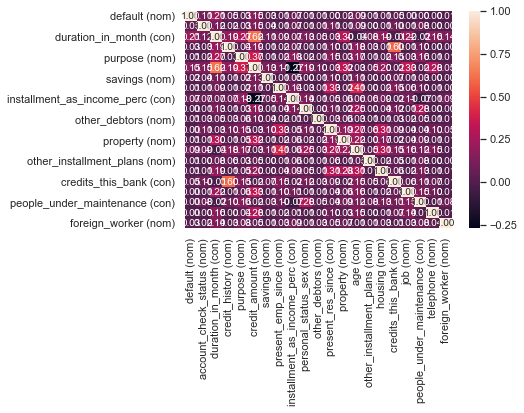

In [9]:
#Lets check correlation among columns of dataframe.
from dython.nominal import associations
corr_df=associations(origCreditDf, nominal_columns=['default','account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephone',
       'foreign_worker'], mark_columns=True, theil_u=True, plot=True, return_results=True)


In [10]:
corr_df

,default (nom),account_check_status (nom),duration_in_month (con),credit_history (nom),purpose (nom),credit_amount (con),savings (nom),present_emp_since (nom),installment_as_income_perc (con),personal_status_sex (nom),...,present_res_since (con),property (nom),age (con),other_installment_plans (nom),housing (nom),credits_this_bank (con),job (nom),people_under_maintenance (con),telephone (nom),foreign_worker (nom)
default (nom),1.000000,0.107500,0.214927,0.049493,0.028247,0.154739,0.031902,0.014867,0.072404,0.007728,...,0.002967,0.019273,0.091127,0.010071,0.014471,0.045732,0.001517,0.003015,0.001093,0.006607
account_check_status (nom),0.052573,1.000000,0.118855,0.024831,0.027883,0.145556,0.037330,0.011421,0.074606,0.005207,...,0.108725,0.006893,0.090730,0.001695,0.007726,0.097804,0.006513,0.076944,0.002639,0.002581
duration_in_month (con),0.214927,0.118855,1.000000,0.194654,0.273692,0.624984,0.105586,0.093996,0.074749,0.133419,...,0.034067,0.304274,-0.036136,0.077902,0.192174,-0.011284,0.218688,-0.023834,0.164718,0.138196
credit_history (nom),0.025480,0.026139,0.194654,1.000000,0.039900,0.193283,0.009393,0.017312,0.072874,0.011302,...,0.098787,0.007824,0.176836,0.030006,0.007789,0.595094,0.005593,0.097687,0.002144,0.003431
purpose (nom),0.009335,0.018842,0.273692,0.025614,1.000000,0.370954,0.014289,0.015998,0.182953,0.018441,...,0.151836,0.033483,0.171765,0.010225,0.022393,0.146968,0.029645,0.163750,0.013384,0.007179
credit_amount (con),0.154739,0.145556,0.624984,0.193283,0.370954,1.000000,0.129507,0.111905,-0.271316,0.187014,...,0.028926,0.318339,0.032716,0.048336,0.201812,0.020795,0.334607,0.017142,0.276995,0.050050
savings (nom),0.016658,0.039858,0.105586,0.009528,0.022578,0.129507,1.000000,0.013570,0.046553,0.004986,...,0.099015,0.007897,0.112603,0.000398,0.001975,0.074588,0.006799,0.033914,0.003656,0.000748
present_emp_since (nom),0.006079,0.009549,0.093996,0.013751,0.019794,0.111905,0.010627,1.000000,0.140501,0.028665,...,0.325431,0.020539,0.409607,0.003227,0.019023,0.154743,0.062587,0.097989,0.007580,0.003070
installment_as_income_perc (con),0.072404,0.074606,0.074749,0.072874,0.182953,-0.271316,0.046553,0.140501,1.000000,0.143033,...,0.049302,0.055589,0.058266,0.057177,0.094890,0.021669,0.111352,-0.071207,0.014413,0.090024
personal_status_sex (nom),0.004445,0.006125,0.133419,0.012628,0.032098,0.187014,0.005493,0.040323,0.143033,1.000000,...,0.113764,0.022221,0.245809,0.003382,0.040270,0.118680,0.009094,0.284250,0.003767,0.002179


In [11]:
# We will ignore very weak correlations
#0.00-0.19: very weak
#0.20-0.39: weak
#0.40-0.59: moderate 
#0.60-0.79: strong
#0.80-1.00: very strong.

corr_triu = corr_df.where(~np.tril(np.ones(corr_df.shape)).astype(np.bool))
corr_triu = corr_triu.stack()
corr_triu[corr_triu > 0.19]


default (nom)              duration_in_month (con)           0.214927
duration_in_month (con)    credit_history (nom)              0.194654
                           purpose (nom)                     0.273692
                           credit_amount (con)               0.624984
                           property (nom)                    0.304274
                           housing (nom)                     0.192174
                           job (nom)                         0.218688
credit_history (nom)       credit_amount (con)               0.193283
                           credits_this_bank (con)           0.595094
purpose (nom)              credit_amount (con)               0.370954
credit_amount (con)        property (nom)                    0.318339
                           housing (nom)                     0.201812
                           job (nom)                         0.334607
                           telephone (nom)                   0.276995
present_emp_since (n

In [12]:
origCreditDf.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [13]:
#Let's drop irrelevant columns (columns which were part of very weak corelations)
selColumns_CreditDf=origCreditDf.copy()
selColumns_CreditDf=selColumns_CreditDf.drop(["account_check_status","duration_in_month","savings","installment_as_income_perc","other_debtors",
              "other_installment_plans","telephone","foreign_worker"],axis=1)
print(selColumns_CreditDf.info())
print(selColumns_CreditDf.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
default                     1000 non-null int64
credit_history              1000 non-null object
purpose                     1000 non-null object
credit_amount               1000 non-null int64
present_emp_since           1000 non-null object
personal_status_sex         1000 non-null object
present_res_since           1000 non-null int64
property                    1000 non-null object
age                         1000 non-null int64
housing                     1000 non-null object
credits_this_bank           1000 non-null int64
job                         1000 non-null object
people_under_maintenance    1000 non-null int64
dtypes: int64(6), object(7)
memory usage: 101.6+ KB
None
Index(['default', 'credit_history', 'purpose', 'credit_amount',
       'present_emp_since', 'personal_status_sex', 'present_res_since',
       'property', 'age', 'housing', 'credits_this_bank', 'job',
     

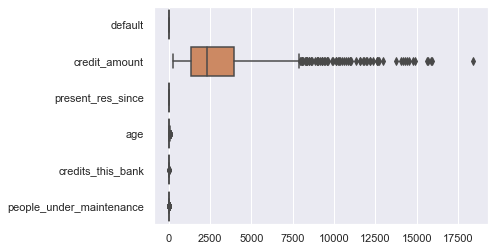

In [14]:
#we will look into all the boxplot individually to trace out outliers
ax = sns.boxplot(data=selColumns_CreditDf, orient="h")

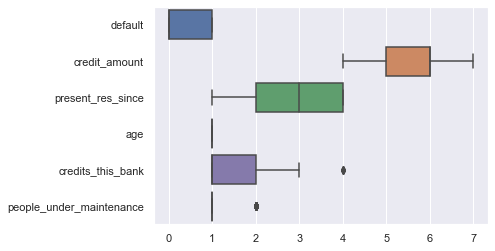

In [15]:
# Boxplots show presence of outliers as whiskers can be seen. We will treat outlier by using Inter quantile range.
# Let's normalize colmns for age and credit amount using boxcox
from scipy import stats
selColumns_CreditDf['age']= stats.boxcox(selColumns_CreditDf['age'])[0].astype(int)
selColumns_CreditDf['credit_amount']=stats.boxcox(selColumns_CreditDf['credit_amount'])[0].astype(int)
ax = sns.boxplot(data=selColumns_CreditDf, orient="h")


In [16]:
#encoding the categorical variables
encoded_creditdf=pd.get_dummies(selColumns_CreditDf, columns=['credit_history','purpose',
       'present_emp_since','personal_status_sex','property','credits_this_bank', 'housing','job'])
print(encoded_creditdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
default                                                                       1000 non-null int64
credit_amount                                                                 1000 non-null int32
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int32
people_under_maintenance                                                      1000 non-null int64
credit_history_all credits at this bank paid back duly                        1000 non-null uint8
credit_history_critical account/ other credits existing (not at this bank)    1000 non-null uint8
credit_history_delay in paying off in the past                                1000 non-null uint8
credit_history_existing credits paid back duly till now                       1000 non-null uint8
credit_histo

In [17]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split
#separating target column
y = encoded_creditdf['default']
#removing target column from features
X = encoded_creditdf.loc[:, encoded_creditdf.columns != 'default']
#70:30 train test division
X_train, X_test, y_train, y_test = train_test_split( encoded_creditdf, y, test_size=0.3, random_state=42,)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 44) (300, 44) (700,) (300,)


In [18]:
# Randomforest Model without parameter tuning
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=28)

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

rf=rf.fit(X_train, y_train)
preds = rf.predict_proba(X_test)[:,1]
y_pred=rf.predict(X_test)

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 28,
 'verbose': 0,
 'warm_start': False}


C:\Users\phlegmatic\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
#calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def calculate_confusion_matrix(y_true, y_pred):
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    
calculate_confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))    

[[209   0]
 [  2  89]]
0.9933333333333333


Text(0.5, 0, 'Relative Importance')

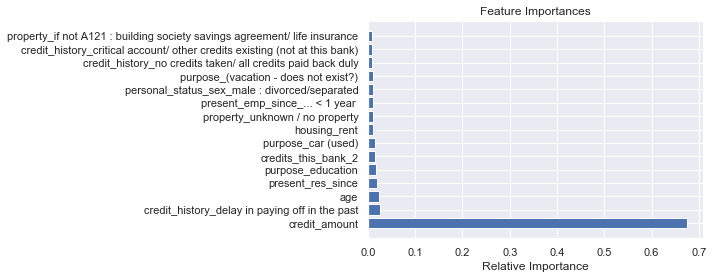

In [20]:
# View a list of the features and their importance scores
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = encoded_creditdf.columns[:]
features= a.drop('default',1)
#plot it
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

As we can see credit amount, credit history delay, age are the important features determined by the model to classify the person profile. 

In [21]:
trainResult = rf.score(X_train, y_train)
testResult = rf.score(X_test, y_test)
print("Train Accuracy:",(trainResult*100.0))
print("Test Accuracy:" ,(testResult*100.0))

Train Accuracy: 100.0
Test Accuracy: 99.33333333333333


In [22]:
#Hyper Parameter tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [23]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   20.6s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [24]:
#best parameters from fitting the random search:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [25]:
#Evaluate Random Search
#To determine if random search yielded a better model, we compare the base model with the best random search model.
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.0167 degrees.
Accuracy = 94.51%.


In [26]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Improvement of 5.81%.


In [27]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search using 3 folds
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,200]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model with kfold where k=3
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [28]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   24.9s finished
C:\Users\phlegmatic\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 200}

In [29]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.0033 degrees.
Accuracy = 98.90%.
Improvement of 4.65%.


In [30]:
num_folds = 5
seed = 28
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=num_folds, random_state=seed)

results = cross_val_score(best_grid, X_train, y_train, cv=kfold)
print(results)
print("All column cross_val_score: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.99285714 0.98571429 1.         1.         0.99285714]
All column cross_val_score: 99.429% (0.535%)


# Findings

Because we have normalized key column like age, credit_amount using boxcox method. Also the weak corelations between categorical columns allowed us to drop certain columns and make our model simpler.

Hyper parameter tuning using random search as well as GridSearchCV improved the accuracy of our model further. K-fold validation gives 99% accuracy to our model which gives us lot of confidence to classify the person profile as good credit or bad credit.